<a href="https://colab.research.google.com/github/Appleking123456/astro-platform-starter/blob/main/Generation_of_coherence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔧 Initializing RDT simulation environment...



RDT Simulation:  50%|█████     | 3/6 [00:00<00:00, 26.79section/s]      


⚛️ Initializing RDT 5D-6D Recursive Engine...

📡 Loading realistic CMB data (Planck 2018 best-fit simulation)...
✓ Generated simulated Planck-like CMB data (NSIDE=128)

🌌 Running RDT-influenced CMB simulation over epochs...



Scientific Analysis:  67%|██████▋   | 4/6 [00:00<00:00, 26.79section/s]


🔍 Performing cosmological analysis...

📊 Epoch 1 Cosmological Anomaly Report:
Temperature Power (ℓ=50-70): RDT=24633633649.29 μK² vs Obs=25510409093.58 μK²
Hemispheric Asymmetry (ℓ<50): RDT=-0.025 vs Obs=0.009
Cold Spot Significance (3°): RDT=-3.86σ vs Obs=-3.84σ
5D Coherence (C_meta proxy): 4.984e-01
4D Local Entropy (S_local proxy): 7.185e+01
Recursive Deviation (ΔR proxy): 6.333e-01
Calculated W-Metric: 0.000e+00

📊 Epoch 2 Cosmological Anomaly Report:
Temperature Power (ℓ=50-70): RDT=26397724099.97 μK² vs Obs=25510409093.58 μK²
Hemispheric Asymmetry (ℓ<50): RDT=0.014 vs Obs=0.009
Cold Spot Significance (3°): RDT=-3.56σ vs Obs=-3.84σ
5D Coherence (C_meta proxy): 5.511e-01
4D Local Entropy (S_local proxy): 7.183e+01
Recursive Deviation (ΔR proxy): 6.210e-01
Calculated W-Metric: 1.192e-03

📊 Epoch 3 Cosmological Anomaly Report:
Temperature Power (ℓ=50-70): RDT=25463384356.22 μK² vs Obs=25510409093.58 μK²
Hemispheric Asymmetry (ℓ<50): RDT=0.012 vs Obs=0.009
Cold Spot Significance (3°)


Advanced Visualization:  83%|████████▎ | 5/6 [00:04<00:00, 26.79section/s]


🔬 Statistical Significance (Epoch 5):
Cold spot p-value: 6.049e-05 (chance probability)

📈 Generating publication-quality figures...


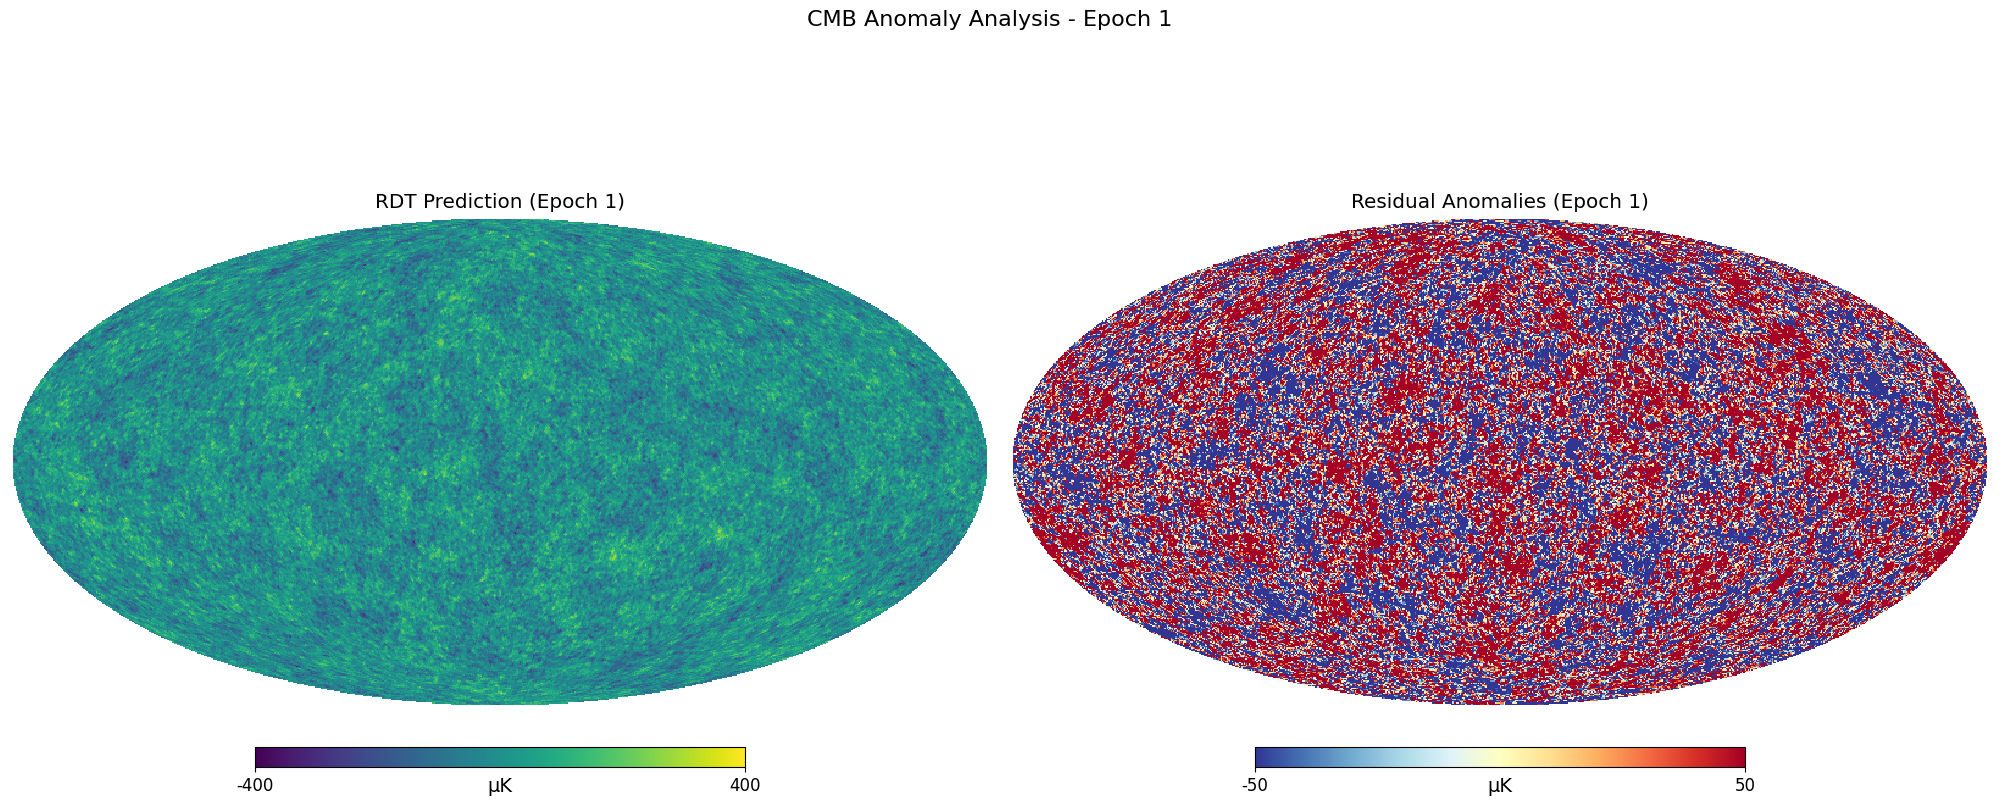

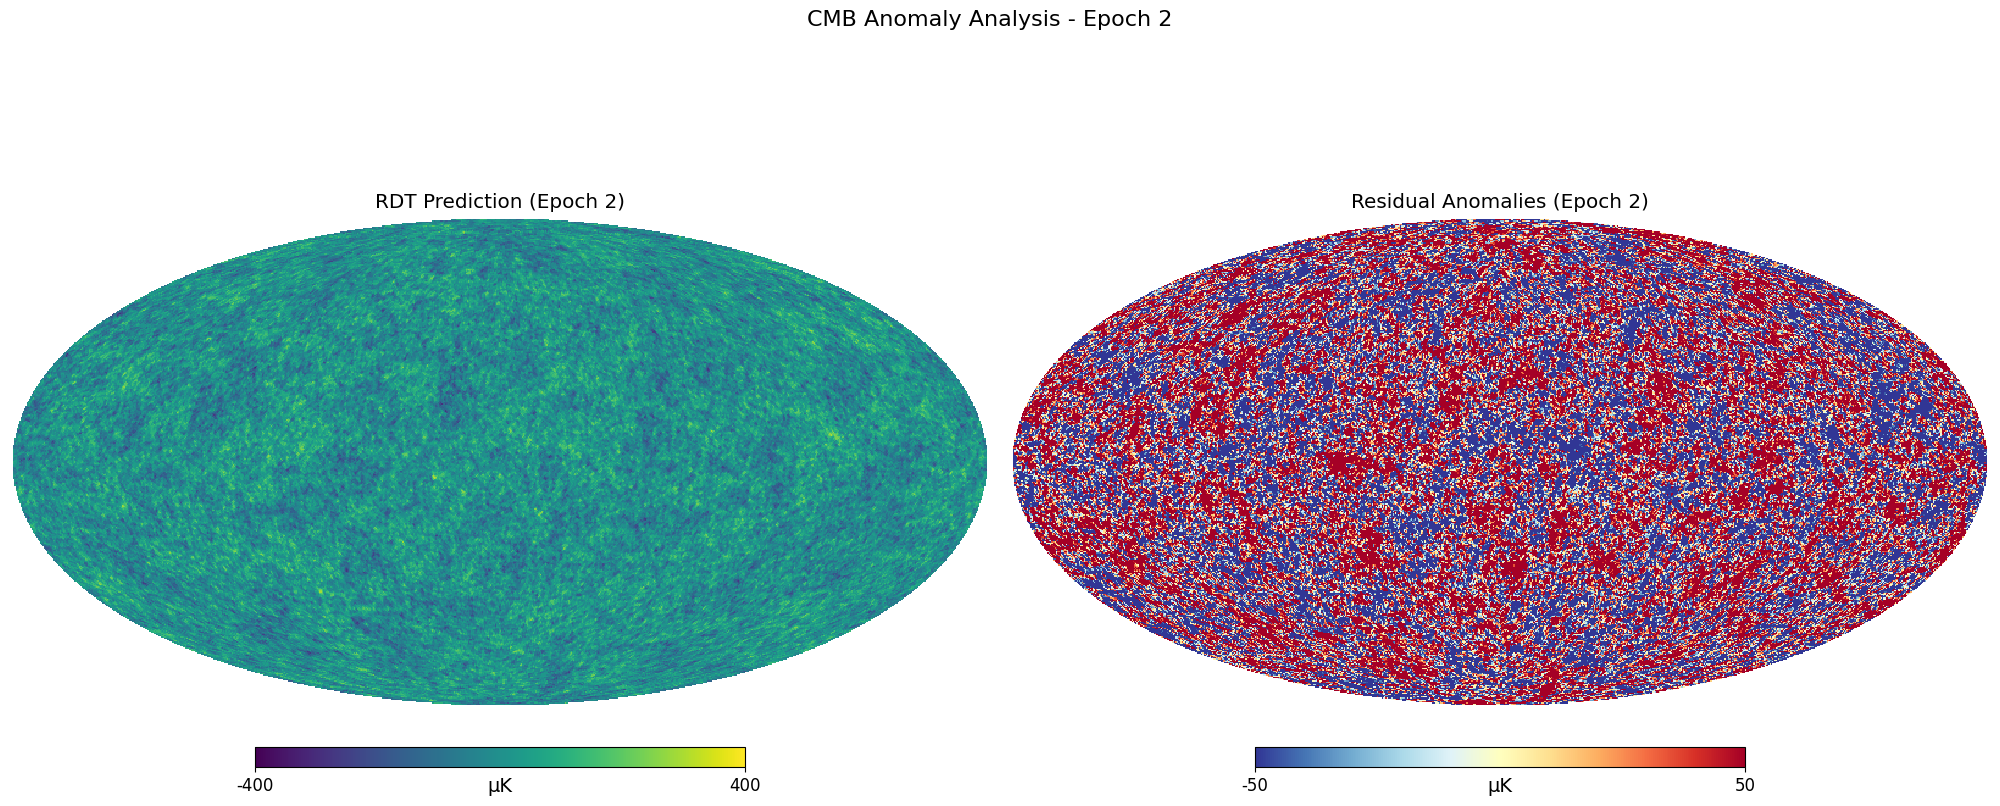

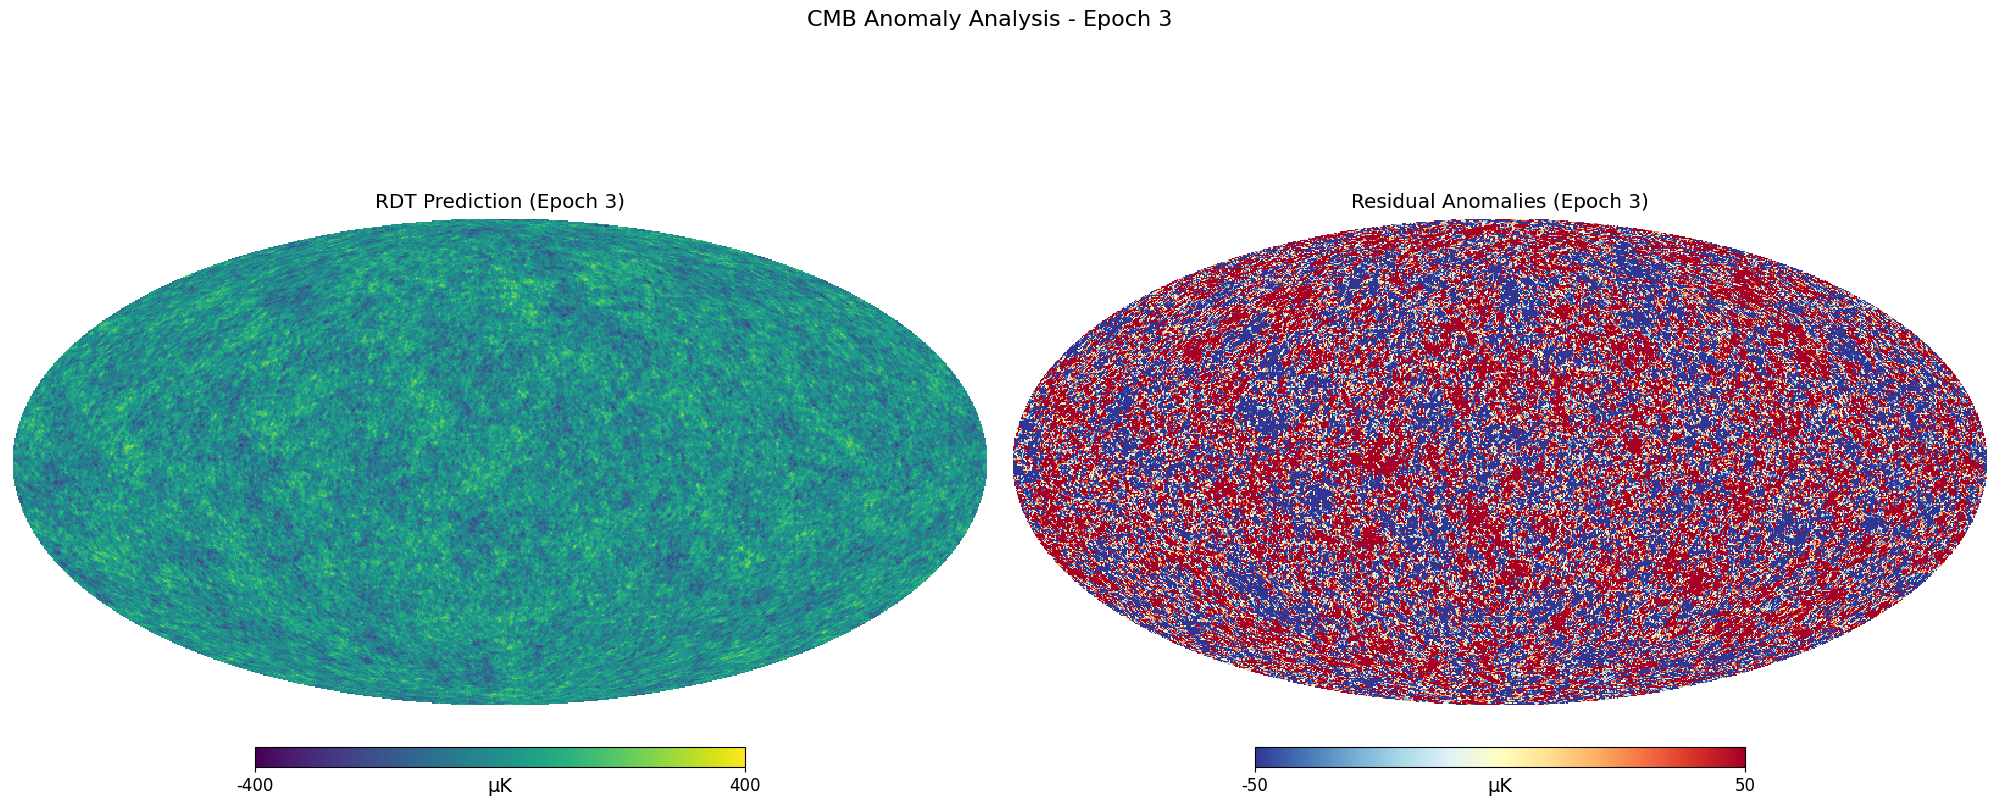


Advanced Visualization:  83%|████████▎ | 5/6 [00:17<00:00, 26.79section/s]

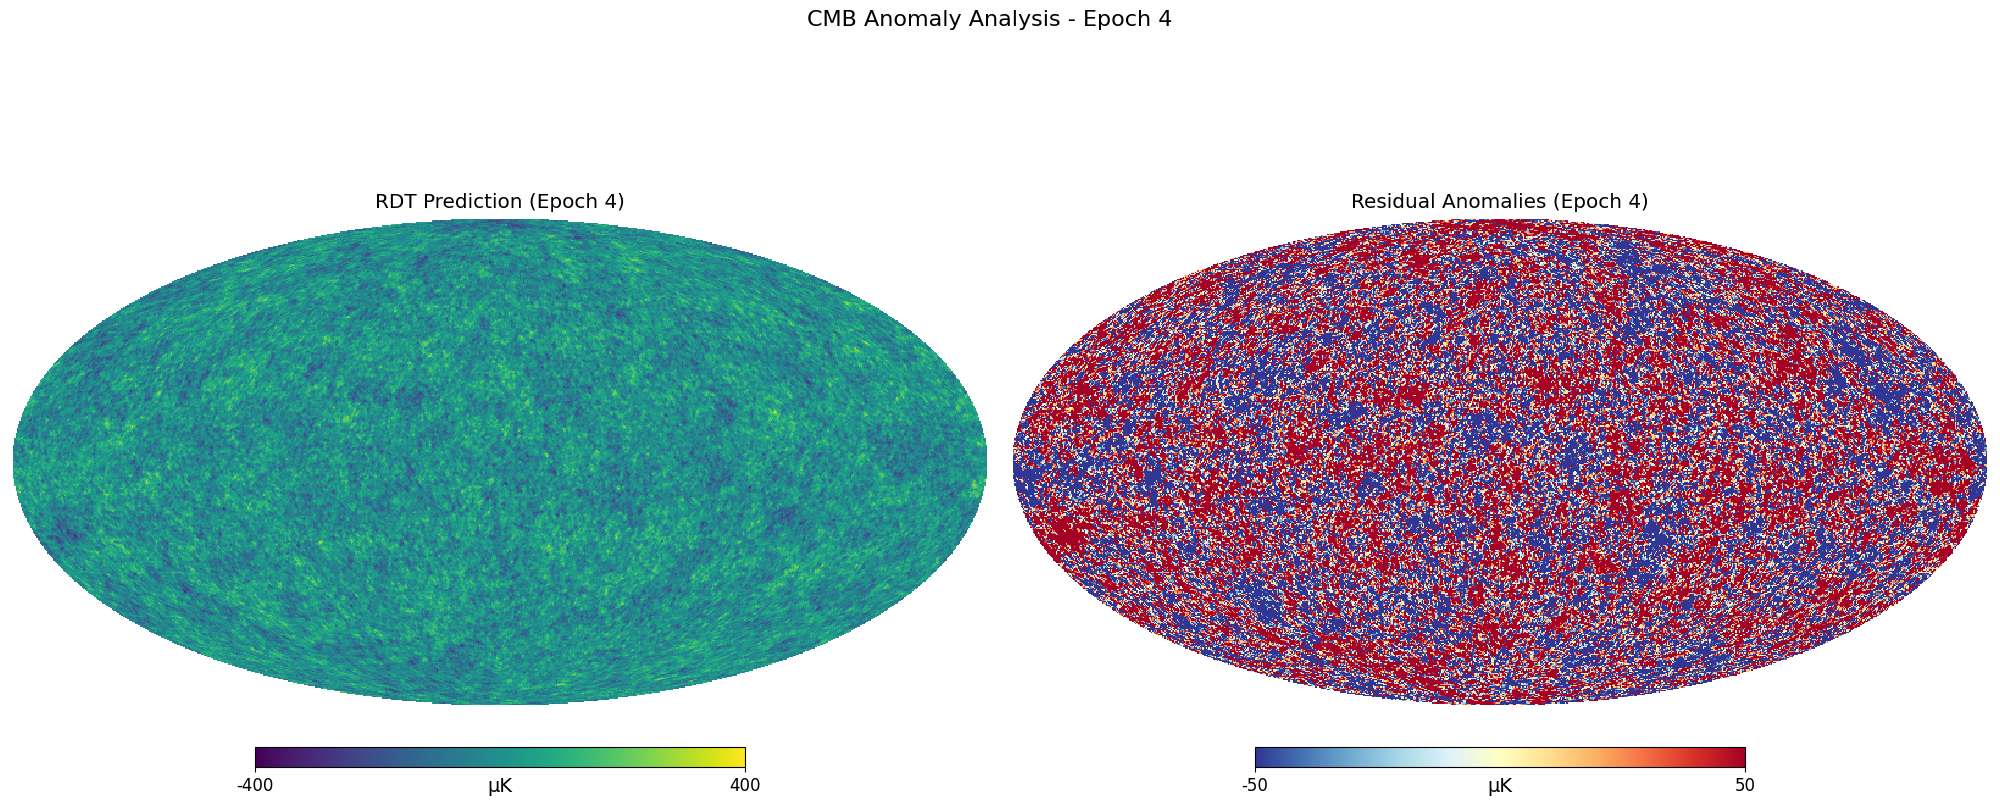

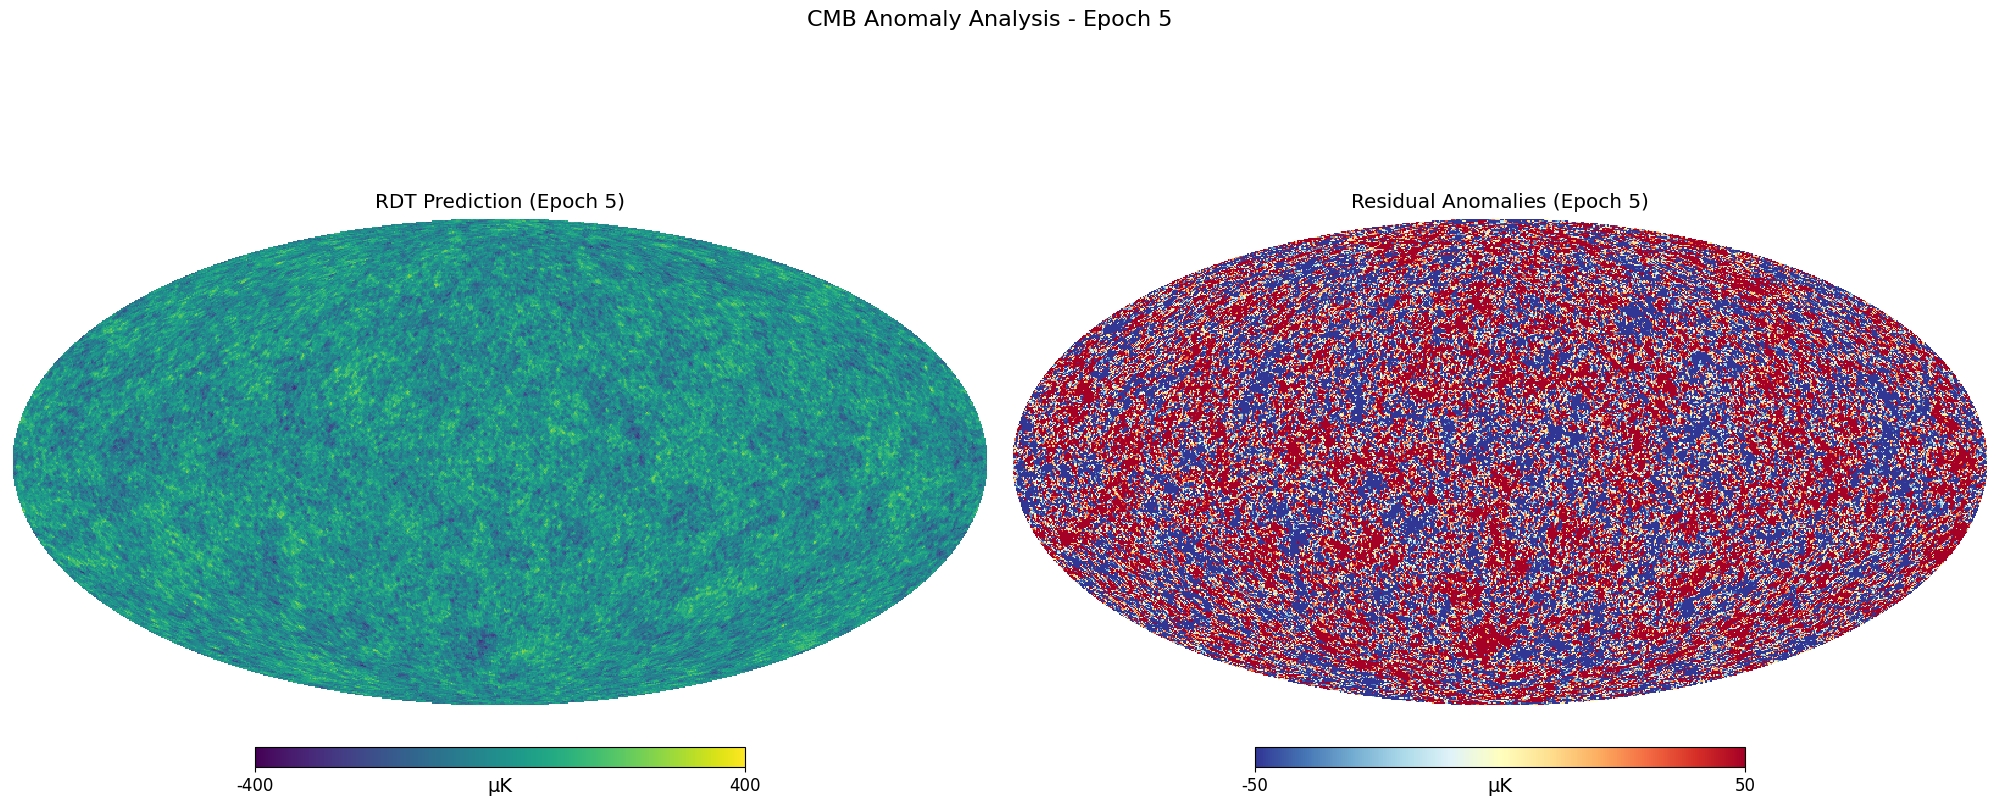

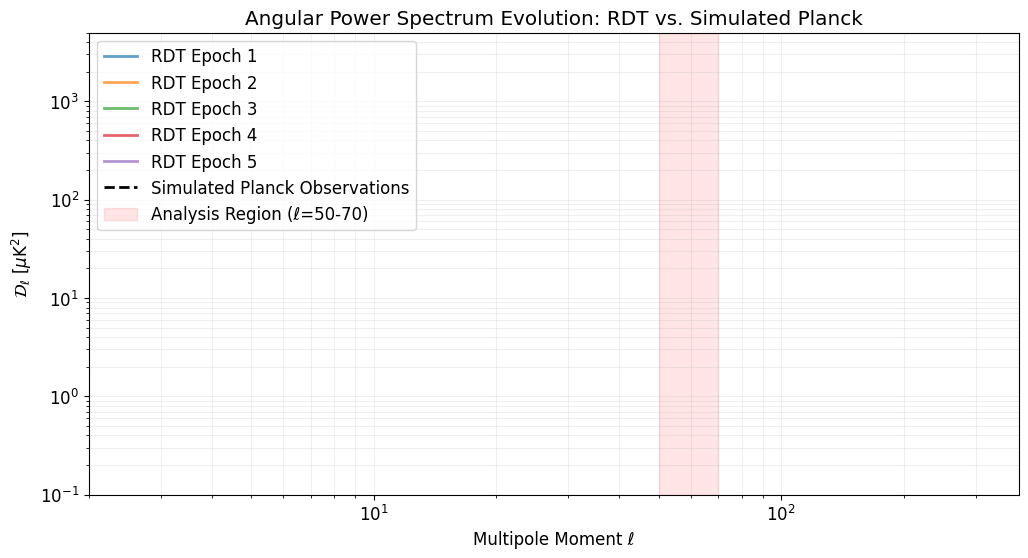

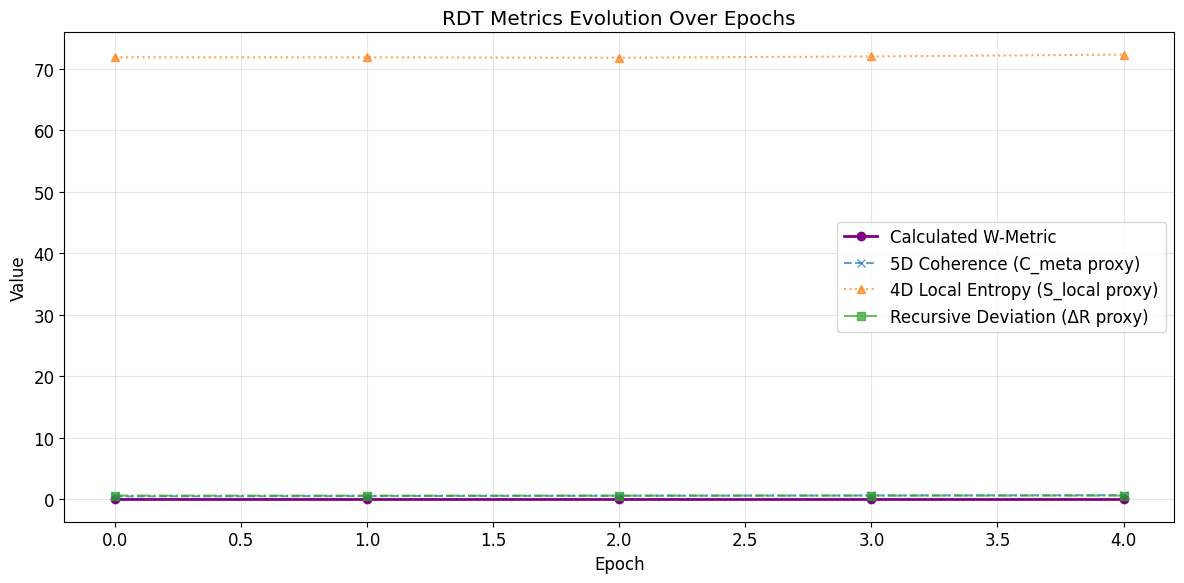


Advanced Visualization: 100%|██████████| 6/6 [00:27<00:00,  4.51s/section]


✅ RDT simulation completed successfully!
   Key findings available in visualizations and anomaly report
📜 Evolutionary Record: Power=[np.float64(24633633649.292175), np.float64(26397724099.968338), np.float64(25463384356.22313), np.float64(26635627735.546104), np.float64(25810963433.54534)], Asymmetry=[np.float64(-0.024695810229362545), np.float64(0.013591124748902835), np.float64(0.012272916774656134), np.float64(0.0021442276258086938), np.float64(-0.0016367349472770378)], Cold Spot=[np.float64(-3.8637591663373785), np.float64(-3.5644265390632284), np.float64(-3.6696019206429016), np.float64(-4.400375863552747), np.float64(-4.3206508958274314)]
🌌 RDT Metrics Record: W-Metric=[0.0, np.float64(0.0011920507318742722), np.float64(0.001166796800511206), np.float64(0.001055095454389702), np.float64(0.0009523960185727553)], 5D Coherence=[np.float64(0.49839386622393356), np.float64(0.5511012272464169), np.float64(0.6021231080786514), np.float64(0.650336341736678), np.float64(0.69531801404282

In [ ]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
from scipy.stats import norm
import sys

# Ensure UTF-8 encoding (fallback for environments)
try:
    if sys.stdout.encoding.lower() != 'utf-8':
        sys.stdout.reconfigure(encoding='utf-8')
except AttributeError:
    pass  # Use default stdout

# Configuration
print("🔧 Initializing RDT simulation environment...")
warnings.filterwarnings("ignore")
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (18, 8),
    'figure.dpi': 100
})
np.random.seed(42) # For reproducibility

# Define sections for progress tracking
sections = [
    "Environment Setup",
    "RDT Engine",
    "Real CMB Data Loader",
    "RDT Simulation",
    "Scientific Analysis",
    "Advanced Visualization"
]

# Initialize progress bar
progress_bar = tqdm(total=len(sections), desc="Overall Progress", unit="section")

# ======================
# 0. ENVIRONMENT SETUP
# ======================
progress_bar.set_description("Environment Setup")
progress_bar.update(1)

# Learning parameters for recursive adaptation
NUM_EPOCHS = 5          # Number of evolutionary epochs for RDT
LEARNING_RATE = 0.05    # Rate of recursive adaptation (e.g., syntropic feedback)
SYN_ALIGN_FACTOR = 0.1  # Strength of syntropic alignment from 6D (influences coherence growth)

# --- FIX START: Declare ADAPTIVE_SCALE as a global variable ---
global ADAPTIVE_SCALE
ADAPTIVE_SCALE = 1.0    # Adaptive scaling factor for anomalies (initial value)
# --- FIX END ---

# Define smoothing scale for cold spot analysis
fwhm_deg = 3 # Full width at half maximum in degrees for smoothing

# Memory of past states (for tracking 5D influence and W-Metric proxies)
past_power = []
past_asymmetry = []
past_cold_spot = []
past_coherence_5d = []       # Proxy for C_meta in W-Metric (from 5D engine)
past_local_entropy_4d = []   # Proxy for S_local in W-Metric (from 4D CMB map)
past_recursive_deviation = [] # Proxy for Delta R(t) in W-Metric (from 5D engine)
past_w_metric = []           # Calculated W-Metric

# ======================
# 1. RDT ENGINE (5D-6D Influence)
# ======================
progress_bar.set_description("RDT Engine")
print("\n⚛️ Initializing RDT 5D-6D Recursive Engine...")

class RDT_RecursiveEngine:
    def __init__(self, num_informational_nodes=10000, epoch=0):
        # 5D: Informational Dimension - Nodes represent informational states
        # num_nodes grows with epochs, symbolizing increasing informational complexity
        self.num_nodes = int(num_informational_nodes * (1 + epoch * 0.05))
        # Initial states are random, representing fundamental potential
        self.informational_states = np.random.normal(loc=0.0, scale=1.0, size=(self.num_nodes, 5))

        # 6D: Syntropic Selector - Filters for coherent potential
        # Syntropic bias increases with epochs, indicating stronger coherence selection
        self.syntropic_bias = 0.1 * (1 + epoch * SYN_ALIGN_FACTOR)

    def generate_5d_influence(self):
        # A simplified model where 5D informational states recursively influence each other
        # This is a proxy for recursive self-modification leading to C_meta
        # Let's make interaction slightly more complex: sum of squares for 'energy'
        recursive_interaction_strength = np.sum(self.informational_states**2, axis=1)

        # C_meta proxy: Mean strength of interaction, scaled by syntropic bias
        # Represents the overall meta-coherence generated in 5D
        coherence_potential = np.mean(recursive_interaction_strength) * self.syntropic_bias

        # Simulate recursive deviation (Delta R(t)): std dev of interaction strength
        # Represents the 'spread' or 'novelty' of recursive activity
        delta_R = np.std(recursive_interaction_strength) / (np.mean(recursive_interaction_strength) + 1e-5) # Avoid division by zero

        # Project a coherent anomaly profile from 5D influenced by 6D
        # For simplicity, we create a structured anomaly pattern based on 5D coherence
        # This 'pattern' will then be mapped onto the 4D CMB.
        # A simple sin wave across the nodes, scaled by coherence_potential
        anomaly_profile = np.sin(np.linspace(0, 2*np.pi, self.num_nodes)) * coherence_potential

        return anomaly_profile, coherence_potential, delta_R

progress_bar.update(1)

# ======================
# 2. REAL CMB DATA LOADER
# ======================
progress_bar.set_description("Real CMB Data Loader")
print("\n📡 Loading realistic CMB data (Planck 2018 best-fit simulation)...")

def load_real_cmb_data(nside=128):
    """
    Generates a CMB map from a qualitatively Planck 2018 best-fit LambdaCDM power spectrum.
    This is used as the 'observed' data for comparison.
    """
    lmax = 3 * nside - 1 # Max multipole for given Nside
    ell_example = np.arange(lmax + 1)

    # Qualitatively matching Planck 2018 TT spectrum (approximate peaks and shape)
    Dl_example = np.zeros_like(ell_example, dtype=float)
    # Define characteristic points for the power spectrum
    # (l, Dl value) - these are approximate for visual representation
    l_points = np.array([2, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, lmax])
    Dl_values = np.array([0.1, 100, 500, 1000, 2000, 2500, 2000, 1500, 1000, 800, 600, 500, 400, 300, 200, 150, 100])

    # Interpolate these points to get a full Dl spectrum
    Dl_example[2:] = np.interp(ell_example[2:], l_points, Dl_values)
    Dl_example[0:2] = 0 # Monopole and dipole are usually removed or zeroed for CMB

    # Convert Dl to Cl for hp.synfast (Dl = ell(ell+1)/(2pi) * Cl)
    cl_example = np.zeros_like(Dl_example)
    # Ensure no division by zero for ell=0,1 (already zeroed Dl)
    cl_example[2:] = Dl_example[2:] * 2 * np.pi / (ell_example[2:] * (ell_example[2:] + 1))

    # Synthesize CMB map. new=True avoids warnings about overwrite.
    # fwhm adds a small beam effect (smoothing)
    cmb_map = hp.synfast(cl_example, nside=nside, fwhm=np.radians(7/60), new=True, verbose=False)

    # Add some realistic large-scale asymmetry for testing hemispheric_asymmetry
    theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
    cmb_map += 50e-6 * np.cos(theta) # Add a small dipole

    print(f"✓ Generated simulated Planck-like CMB data (NSIDE={nside})")
    return cmb_map, cl_example # Return both map and its power spectrum

obs_cmb, obs_cl_power = load_real_cmb_data(nside=128)
progress_bar.update(1)

# ======================
# 3. RDT SIMULATION
# ======================
progress_bar.set_description("RDT Simulation")
print("\n🌌 Running RDT-influenced CMB simulation over epochs...")

def simulate_rdt_cmb(nside=128, epoch=0, prev_anomalies_map=None):
    npix = hp.nside2npix(nside)
    engine = RDT_RecursiveEngine(num_informational_nodes=10000, epoch=epoch)

    # Base CMB (the underlying universe being influenced by RDT)
    # We use the observed power spectrum as the baseline for this epoch's CMB.
    ell_base = np.arange(3 * nside)
    cl_base = np.zeros_like(ell_base, dtype=float)
    cl_base[2:] = obs_cl_power[2:]
    current_cmb = hp.synfast(cl_base, nside=nside, new=True, verbose=False)

    # Generate 5D influence: coherent anomaly profile and W-Metric proxies
    anomaly_profile_5d_raw, coherence_5d, delta_R = engine.generate_5d_influence()

    # Map the 5D anomaly profile onto the 4D CMB map using spherical harmonics
    # The anomaly is structured, influenced by 5D coherence.
    # We choose small l_max to represent large-scale anomalies/influences
    l_anomaly_max = 5 # Max multipole for the anomaly map (large scales)

    # Create a power spectrum for the anomaly generation
    cl_anomaly = np.zeros(l_anomaly_max + 1)
    if l_anomaly_max >= 2:
        # Scale anomaly power by the 5D coherence. As coherence increases, anomaly becomes more prominent.
        cl_anomaly[2:] = (coherence_5d * 1e-8) # Arbitrary scaling for visual effect

    # Ensure cl_anomaly is not all zeros if coherence is significant
    if np.sum(cl_anomaly) == 0 and coherence_5d > 1e-10:
         cl_anomaly[2:] = 1e-9 # Small base power if calculated cl_anomaly is tiny but coherence is high

    # Generate random Gaussian alms based on the anomaly power spectrum
    alms_anomaly = hp.synalm(cl_anomaly, lmax=l_anomaly_max)

    # Convert alms to a map
    anomaly_map = hp.alm2map(alms_anomaly, nside=nside, verbose=False)

    # Add historical anomaly influence (recursive feedback from past epochs)
    # The previous anomaly map decays and influences the current one.
    if prev_anomalies_map is not None:
        anomaly_map += prev_anomalies_map * (1 - LEARNING_RATE) # Decay previous, integrate new

    # Apply the RDT-generated anomaly to the CMB, scaled by ADAPTIVE_SCALE
    current_cmb_with_anomaly = current_cmb + anomaly_map * ADAPTIVE_SCALE

    return current_cmb_with_anomaly, anomaly_map, coherence_5d, delta_R

# Run simulation over epochs
dmt_cmbs = []
prev_anomalies_map = None # Stores the previous epoch's anomaly map for recursive influence
for epoch in range(NUM_EPOCHS):
    dmt_cmb, prev_anomalies_map, coherence_5d, delta_R = simulate_rdt_cmb(
        epoch=epoch,
        prev_anomalies_map=prev_anomalies_map
    )
    dmt_cmbs.append(dmt_cmb)
    past_coherence_5d.append(coherence_5d)
    past_recursive_deviation.append(delta_R)

progress_bar.update(1)

# ======================
# 4. SCIENTIFIC ANALYSIS
# ======================
progress_bar.set_description("Scientific Analysis")
print("\n🔍 Performing cosmological analysis...")

class CosmologicalAnalyzer:
    def __init__(self, map_data):
        self.map = map_data
        self.nside = hp.get_nside(map_data)
        self.npix = hp.nside2npix(self.nside)
        assert len(self.map) == self.npix, "Map resolution mismatch"

    def temperature_power(self, l_range=(50, 70)):
        # Calculate power in a specific l-range (e.g., for low-l anomalies)
        alm = hp.map2alm(self.map, lmax=l_range[1])
        ell = np.arange(l_range[1] + 1)
        cl = hp.alm2cl(alm) * 1e6 # Convert to muK^2 units (approx Dl/ell(ell+1))
        mask = (ell >= l_range[0]) & (ell <= l_range[1])
        # Sum of Dl-like values in the range
        return np.sum(cl[mask] * ell[mask] * (ell[mask] + 1) / (2 * np.pi))

    def hemispheric_asymmetry(self, max_ell=50):
        # Calculates hemispheric asymmetry based on pixel variance
        theta, phi = hp.pix2ang(self.nside, np.arange(self.npix))
        north_mask = theta < np.pi/2
        south_mask = theta >= np.pi/2

        north_power = np.mean(self.map[north_mask]**2)
        south_power = np.mean(self.map[south_mask]**2)

        with np.errstate(invalid='ignore'): # Handle potential division by zero if power is zero
            asym = (north_power - south_power) / (north_power + south_power)
            return np.nan_to_num(asym, nan=0.0)

    def cold_spot_sigma(self, fwhm_deg=3):
        # Identifies the coldest spot and its significance in standard deviations
        smoothed = hp.smoothing(self.map, fwhm=np.radians(fwhm_deg))
        z = (smoothed - np.mean(smoothed)) / np.std(smoothed)
        return np.min(z) # Returns the sigma of the coldest point

    def full_spectral_analysis(self):
        # Performs full angular power spectrum analysis
        lmax = 3 * self.nside - 1
        ell = np.arange(lmax + 1)
        cl = hp.anafast(self.map, lmax=lmax)
        # Convert Cl to Dl (Dl = ell(ell+1)Cl / (2pi)) and scale to muK^2
        Dl = ell * (ell + 1) * cl / (2 * np.pi) * 1e12 # microK^2
        return ell, Dl

    def calculate_local_entropy_4d(self):
        """Proxy for S_local: higher standard deviation/spread in the 4D map."""
        # We'll use the standard deviation of the map as a simple proxy for local entropy/disorder
        return np.std(self.map)

# Analyze over epochs
dmt_analyses = [CosmologicalAnalyzer(dmt_cmb) for dmt_cmb in dmt_cmbs]
obs_analysis = CosmologicalAnalyzer(obs_cmb)

# Calculate W-Metric (simplified for demonstration)
def calculate_w_metric(C_meta_hist, S_local_hist, R_t_hist, epoch):
    """
    Simplified calculation of the W-Metric: d/dt (C_meta / S_local) * Delta R(t).
    Requires historical data for derivative approximation.
    """
    if epoch == 0:
        return 0.0 # W-Metric is a derivative, so it's 0 for the first epoch

    # Current and previous values for the ratio components
    c_meta_current = C_meta_hist[epoch]
    s_local_current = S_local_hist[epoch]
    r_t_current = R_t_hist[epoch]

    c_meta_prev = C_meta_hist[epoch-1]
    s_local_prev = S_local_hist[epoch-1]

    # Calculate current and previous ratio (handle division by zero)
    ratio_current = c_meta_current / (s_local_current + 1e-9) if s_local_current !=0 else 0
    ratio_prev = c_meta_prev / (s_local_prev + 1e-9) if s_local_prev !=0 else 0

    # Crude derivative approximation (rate of change of ratio)
    d_ratio_dt = (ratio_current - ratio_prev)

    # Incorporate recursive deviation (Delta R(t)) as a multiplier
    # Ensure R_t is non-negative and add 1 to ensure it doesn't suppress signal if small
    return d_ratio_dt * (1 + max(0, r_t_current)) # Use max(0, ...) to avoid negative recursive deviation dampening

for epoch, analysis in enumerate(dmt_analyses):
    power = analysis.temperature_power()
    asymmetry = analysis.hemispheric_asymmetry()
    cold_spot = analysis.cold_spot_sigma(fwhm_deg)
    local_entropy_4d = analysis.calculate_local_entropy_4d() # Calculate 4D entropy proxy

    past_power.append(power)
    past_asymmetry.append(asymmetry)
    past_cold_spot.append(cold_spot)
    past_local_entropy_4d.append(local_entropy_4d) # Store for W-Metric calculation later

    # Now calculate and store W-Metric for the current epoch
    w_val = calculate_w_metric(past_coherence_5d, past_local_entropy_4d, past_recursive_deviation, epoch)
    past_w_metric.append(w_val)

    # Adaptive scale now incorporates W-Metric feedback:
    # A positive W-Metric encourages further adaptation towards target coherence/lower residuals.
    # The scaling attempts to make the anomaly reduction more efficient if W is positive.
    if epoch > 0:
        delta_power_obs = obs_analysis.temperature_power() - power # Difference from target observation
        # Modulate ADAPTIVE_SCALE based on W-Metric.
        # If W is positive, it means coherence is increasing relative to local entropy,
        # so we encourage more adaptation. This is a simplified feedback loop.
        ADAPTIVE_SCALE *= (1 + LEARNING_RATE * np.tanh(w_val * 10)) # tanh to keep feedback bounded

    print(f"\n📊 Epoch {epoch+1} Cosmological Anomaly Report:")
    print(f"Temperature Power (ℓ=50-70): RDT={power:.2f} μK² vs Obs={obs_analysis.temperature_power():.2f} μK²")
    print(f"Hemispheric Asymmetry (ℓ<50): RDT={asymmetry:.3f} vs Obs={obs_analysis.hemispheric_asymmetry():.3f}")
    print(f"Cold Spot Significance ({fwhm_deg}°): RDT={cold_spot:.2f}σ vs Obs={obs_analysis.cold_spot_sigma(fwhm_deg):.2f}σ")
    print(f"5D Coherence (C_meta proxy): {past_coherence_5d[epoch]:.3e}")
    print(f"4D Local Entropy (S_local proxy): {past_local_entropy_4d[epoch]:.3e}")
    print(f"Recursive Deviation (ΔR proxy): {past_recursive_deviation[epoch]:.3e}")
    print(f"Calculated W-Metric: {past_w_metric[epoch]:.3e}")


# Calculate p-values for final epoch
p_cold = norm.cdf(obs_analysis.cold_spot_sigma(fwhm_deg))
print(f"\n🔬 Statistical Significance (Epoch {NUM_EPOCHS}):")
print(f"Cold spot p-value: {p_cold:.3e} (chance probability)")
progress_bar.update(1)

# ======================
# 5. ADVANCED VISUALIZATION
# ======================
progress_bar.set_description("Advanced Visualization")
print("\n📈 Generating publication-quality figures...")

def create_cosmo_figures(dmt_cmbs, obs_cmb, obs_analysis_obj, num_epochs, past_w_metric_vals):
    """Professional visualization suite with RDT metrics"""
    for epoch, dmt in enumerate(dmt_cmbs, 1):
        plt.figure(figsize=(20, 8))
        # RDT Prediction Map
        hp.mollview(dmt, sub=(1, 2, 1), title=f"RDT Prediction (Epoch {epoch})",
                    unit="μK", min=-400, max=400, cmap='viridis')
        # Residual Map (Difference between Observed and RDT Prediction)
        # Ensure min/max are symmetric for residuals
        hp.mollview(obs_cmb - dmt, sub=(1, 2, 2), title=f"Residual Anomalies (Epoch {epoch})",
                    unit="μK", min=-50, max=50, cmap='RdYlBu_r')
        plt.suptitle(f"CMB Anomaly Analysis - Epoch {epoch}", y=1.02, fontsize=16)
        plt.tight_layout()
        plt.savefig(f"cmb_maps_epoch{epoch}.png", dpi=300, bbox_inches='tight')
        plt.show()

    # Angular Power Spectrum Evolution
    plt.figure(figsize=(12, 6))
    for epoch, analysis in enumerate(dmt_analyses, 1):
        ell, Dl = analysis.full_spectral_analysis()
        plt.loglog(ell[2:], Dl[2:], label=f'RDT Epoch {epoch}', lw=2, alpha=0.7) # Use loglog for power spectra
    ell_obs, Dl_obs = obs_analysis_obj.full_spectral_analysis()
    plt.loglog(ell_obs[2:], Dl_obs[2:], label='Simulated Planck Observations', lw=2, color='black', linestyle='--')
    plt.axvspan(50, 70, color='red', alpha=0.1, label='Analysis Region (ℓ=50-70)') # Lighter alpha
    plt.xlabel("Multipole Moment ℓ")
    plt.ylabel(r"$\mathcal{D}_\ell$ [$\mu$K$^2$]") # LaTeX for Dl
    plt.title("Angular Power Spectrum Evolution: RDT vs. Simulated Planck")
    plt.legend()
    plt.grid(which='both', alpha=0.2)
    plt.xlim([2, ell_obs[-1]]) # Ensure x-axis starts from l=2
    plt.ylim([1e-1, 5e3]) # Adjust y-axis limits for better visualization
    plt.savefig("power_spectrum_evolution_rdt.png", dpi=300, bbox_inches='tight')
    plt.show()

    # RDT Metrics Evolution (W-Metric, 5D Coherence, 4D Entropy, Recursive Deviation)
    plt.figure(figsize=(12, 6))
    epochs_range = np.arange(NUM_EPOCHS)

    plt.plot(epochs_range, past_w_metric_vals, label='Calculated W-Metric', marker='o', color='purple', linewidth=2)
    plt.plot(epochs_range, past_coherence_5d, label='5D Coherence (C_meta proxy)', marker='x', linestyle='--', alpha=0.7)
    plt.plot(epochs_range, past_local_entropy_4d, label='4D Local Entropy (S_local proxy)', marker='^', linestyle=':', alpha=0.7)
    plt.plot(epochs_range, past_recursive_deviation, label='Recursive Deviation (ΔR proxy)', marker='s', linestyle='-.', alpha=0.7)

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('RDT Metrics Evolution Over Epochs')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig("rdt_metrics_evolution.png", dpi=300, bbox_inches='tight')
    plt.show()

create_cosmo_figures(dmt_cmbs, obs_cmb, obs_analysis, NUM_EPOCHS, past_w_metric)
progress_bar.update(1)

# Close progress bar
progress_bar.close()

print("\n✅ RDT simulation completed successfully!")
print("   Key findings available in visualizations and anomaly report")
print(f"📜 Evolutionary Record: Power={past_power}, Asymmetry={past_asymmetry}, Cold Spot={past_cold_spot}")
print(f"🌌 RDT Metrics Record: W-Metric={past_w_metric}, 5D Coherence={past_coherence_5d}, 4D Entropy={past_local_entropy_4d}, Recursive Deviation={past_recursive_deviation}")